#  Доверительные интервалы


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [3]:
# Случайная выборка данных
data = [10.2, 9.8, 10.5, 10.0, 10.3, 9.7, 10.1, 9.9, 10.4, 10.2]

# Точечная оценка среднего
point_estimate = np.mean(data)
print(f"Точечная оценка среднего: {point_estimate:.3f}")

# Доверительный интервал для среднего с уровнем доверия 95%
confidence = 0.95
n = len(data)
mean = np.mean(data)
std_err = stats.sem(data)  # стандартная ошибка среднего

# t-критическое значение
t_crit = stats.t.ppf((1 + confidence) / 2, df=n-1)

# Интервальная оценка
margin_of_error = t_crit * std_err
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"95% доверительный интервал для среднего: ({ci_lower:.3f}, {ci_upper:.3f})")

Точечная оценка среднего: 10.110
95% доверительный интервал для среднего: (9.924, 10.296)


# Ковариационная матрица

Ковариация показывает, как две переменные изменяются вместе.
- Если положительная — переменные растут вместе.
- Если отрицательная — одна растёт, другая падает.

Ковариация не нормирована (зависит от масштаба данных).

In [6]:
# Загрузка данных
data = pd.read_csv('Kids198.csv', index_col=0)

# Исправленные преобразования единиц измерения
data['Height'] = data['Height'] * 2.54  # Дюймы в сантиметры
data['Age'] = data['Age'] / 12  # Месяцы в годы
data['Weight'] = data['Weight'] * 0.453592  # Фунты в килограммы

# Вывод первых строк для проверки
print(data.head())

    Height     Weight        Age  Sex  Race
1  172.212  75.296272  17.500000    0     1
2  160.020  42.184056  12.000000    1     0
3  127.254  24.493968   9.916667    0     0
4  141.478  31.297848  10.833333    1     0
5  160.528  52.163080  13.083333    0     0


In [7]:
cov_matrix = data.cov()
print(cov_matrix)

            Height      Weight        Age       Sex      Race
Height  236.272332  206.981734  36.066851 -1.987889  0.026685
Weight  206.981734  224.835123  33.007115 -1.844370  0.008652
Age      36.066851   33.007115   7.935794 -0.095024 -0.011037
Sex      -1.987889   -1.844370  -0.095024  0.251038  0.018459
Race      0.026685    0.008652  -0.011037  0.018459  0.107060


## Корреляционная матрица (Пирсона)

Text(0.5, 1.0, 'Корреляция Пирсона')

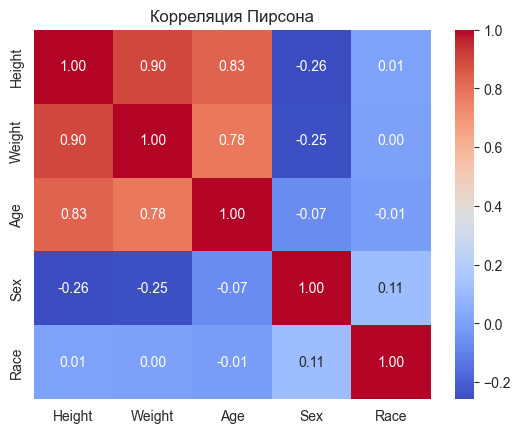

In [9]:
corr_pearson = data.corr(method='pearson')
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция Пирсона")

## Корреляционная матрица (Спирмена)

Text(0.5, 1.0, 'Корреляция Спирмена')

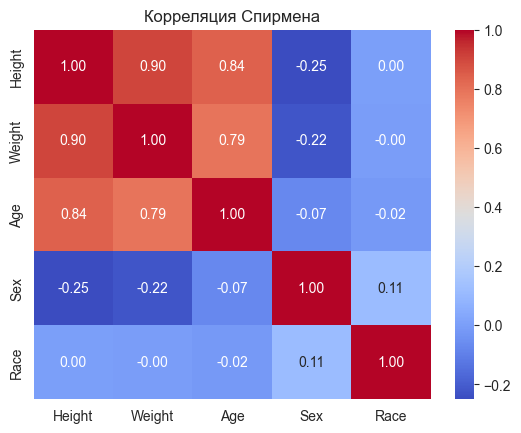

In [10]:
corr_spearman = data.corr(method='spearman')
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция Спирмена")